In [249]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
class CCException(Exception):
    pass
class CompatException(Exception):
    pass
class Check:
    @staticmethod
    def hasCCh(df):
        temp = df.select_dtypes(exclude = float)
        for i in temp.columns.values:
            found = True
            for j in temp[i]:
                if (len(j) != 3):
                    found = False
            if (found == True):
                return i
        return None
    @staticmethod
    def hasCC(df):
        if (Check.hasCCh(df) == None):
            raise CCException('Data does not contain Country Code')
    @staticmethod
    def isCompatH(df1, df2):
        tdf1 = df1.select_dtypes(exclude = float)
        tdf2 = df2.select_dtypes(exclude = float)
        i1 = Check.hasCCh(tdf1)
        i2 = Check.hasCCh(tdf2)
        tdf1 = tdf1.sort_values(i1)
        tdf2 = tdf2.sort_values(i2)
        a1 = tdf1[i1]
        a2 = tdf2[i2]
        if (a1.size != a2.size):
            return False
        for i in range(a1.size - 1):
            if (a1.values[i] != a2.values[i]):
                return False
        return True
    @staticmethod
    def isCompat(df1, df2):
        if (Check.isCompatH(df1, df2) == False):
            raise CompatException('The two data sets do not contain the same countries')
    @staticmethod
    def clean(df):
        temp = df.dropna(axis = 0)
        Check.hasCC(temp)
        return temp 
    @staticmethod
    def getAverage(df):
        temp = df.sort_values(Check.hasCCh(df))
        temp = temp.set_index(temp[Check.hasCCh(df)])
        temp = temp.select_dtypes(include = float)
        temp['Average'] = temp.mean(axis=1)
        return temp['Average']
    @staticmethod
    def merge(df1, df2, n1, n2):
        Check.isCompat(df1, df2)
        master = pd.DataFrame(index = df1[Check.hasCCh])
        master[n1] = Check.getAverage(df1)
        master[n2] = Check.getAverage(df2)
        return master

In [250]:
lf = pd.read_csv('good life.csv')
lf = Check.clean(lf)
gdp = pd.read_csv('gdpc.csv')
gdp = Check.clean(gdp)
master = Check.merge(lf, gdp, 'Life expectancy from last 5 years', 'Average GDP per capita from last 5 years')
temp = master.columns.values
master

,Life expectancy from last 5 years,Average GDP per capita from last 5 years
Country Code,,
GBR,81.055488,43556.281337
USA,78.740854,55377.791998
DEU,80.715854,44532.492643
FRA,82.359146,39771.299610
RUS,71.020915,12059.662800
CHN,76.011250,7736.938467
ZAF,61.394500,6070.792016
JPN,83.674634,38025.986472
BRA,75.153000,10408.278147


0.5806733722872396 0.5806733722872396


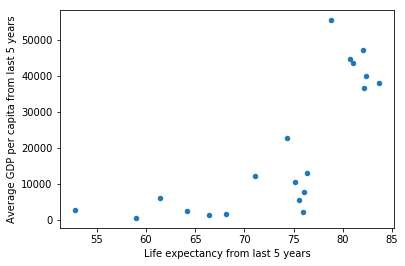

In [251]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax = master.plot(kind = 'scatter', x = temp[0], y = temp[1])
print (slope, r_value)

In [216]:
lf = pd.read_csv('better.csv')
lf = Check.clean(lf)
gdp = pd.read_csv('gdpc.csv')
gdp = Check.clean(gdp)
master = Check.merge(lf, gdp, 'Life expectancy from last 5 years', 'Average GDP per capita from last 5 years')
temp2 = master.columns.values
temp2

array(['Country Code', 'Life expectancy from last 5 years',
       'Average GDP per capita from last 5 years'], dtype=object)

In [3]:
lf = pd.read_csv('good life.csv')
lf = lf.dropna(axis=0)

In [4]:
tlf = lf[['2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]

In [5]:
lf['Average Life expectancy from last 5 years'] = tlf.mean(axis=1)


In [6]:
lf = lf.sort_values('Country Code')


In [7]:
df = df.sort_values('Country Code')


In [8]:
#x = master['Average Life expectancy from last 5 years']
#y = master['Average Gdp per capita']
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#print (r_value, std_err, slope)